# BUSINESS UNDERSTANDING

## OVERVIEW
Breast cancer is one of the leading causes of death among women worldwide. However, it’s not a single disease, it consists of several biologically distinct types such as Luminal A, Luminal B, HER2-enriched, Basal-like, and Normal-like. These subtypes are usually identified using expensive molecular tests(PAM50 Assay), which help oncologist understand how aggressive a tumor is and determine the most effective treatment plan. Unfortunately, such advanced tests are not always accessible.

This project uses machine learning to predict a patient’s tumor molecular subtype and their survival outcome. By doing so, it offers a data-driven tool that can help doctors make better treatment and prognosis decisions for breast cancer without needing to perform the genetic testing.

## PROBLEM STATEMENT
Many hospitals lack access to advanced genetic testing like the PAM50 assay, which is used to identify breast cancer subtypes. Without this information, doctors have limited insight into how aggressive a tumor might be or which treatment will be most effective.

The problem this project addresses is how to accurately predict a patient’s breast cancer tumor type and their survival outcome. Doing so helps guide treatment decisions even when molecular testing is not possible.

## BUSINESS OBJECTIVES
This project has three main goals that connect machine learning predictions to real-world clinical value:

1. **Molecular Subtype Prediction** — Build a model that predicts the PAM50 + Claudin-low molecular subtypes of breast cancer (e.g., Luminal A,
Luminal B, HER2-enriched, Basal-like, and Normal-like).
This model can act as a digital alternative to the molecular(PAM50 genetic) test, allowing oncologist to understand tumor biology and guide personalized treatment decisions without the need of performing the expensive molecular testing.
3. **Binary Survival Prediction** — Build a model that predicts whether a patient is likely to survive or not (LIVING or DECEASED), this helps doctors identify patients who are at high-risk of not surviving early and plan closer monitoring or personalized therapy.

5. **Multi-class Vital Status Prediction** — Build a model that further classifies the survival state of patients as Died of Disease, or Died of Other Causes, or living. This distinguish between cancer-related and non-cancer deaths , helping researchers and doctors understand which factors affect whether a patient dies from cancer itself or whether patient dies from other causes.

# DATA UNDERSTANDING

* The dataset is from the METABRIC (Molecular Taxonomy of Breast Cancer International Consortium) study — a comprehensive breast cancer dataset widely used for clinical and genomic research.
* It contains data from 2,509 patients,  Each row represents a unique patient, and each column captures a clinical, diagnostic, or treatment-related attribute.
  
**Structure of the Data**
* Total records (rows) are 2,509, Total features (columns) are 39
* Data types our data contain 12 numerical columns & 27 categorical columns
* Dataset is in a tsv file format (Tab-separated values)

**Key Features**
* Some key columns include:
1. Pam50 + Claudin-low subtype - Molecular subtype classification (Luminal A, Luminal B, HER2-enriched, Basal-like, Normal-like). Critical for linking molecular biology to treatment response and prognosis
2. Nottingham Prognostic Index (NPI) - A single summary score that combines tumor size, grade, lymph node status — widely used in clinical prognosis prediction.
3. Age at Diagnosis	Age (in years) - when the patient was diagnosed with breast cancer.
4. Type of Breast Surgery -	Indicates the type of surgical procedure performed (e.g., mastectomy, breast-conserving).
5. Inferred Menopausal State - Derived feature (Pre/Post-menopausal) it influences hormone receptor status and therapy choice.
6. Lymph nodes examined positive - Indicates number of lymph nodes with metastasis 
7. Chemotherapy / Hormone Therapy / Radio Therapy -	Binary treatment indicators whether a patient received each therapy.
8. ER, PR, HER2 Status	Biomarkers - indicating estrogen, progesterone, and HER2 receptor status — critical for determining cancer subtype and treatment plan.
9. Neoplasm Histologic Grade - Describes how abnormal a tumor cells look under a microscope & how fast they are likely to grow and spread
10. Tumor Stage / Tumor Size -	Describe the aggressiveness, spread, and physical characteristics of the tumor.
11. Overall Survival (Months) / Status - Time and outcome of patient survival data — useful for prognosis analysis.
12. Overall Survival Status / Vital Status	Indicates whether the patient is alive or deceased.
13. Relapse Free Status (Months) / Status -	Time until recurrence or relapse, useful for recurrence prediction.
14. TMB (Tumor Mutation Burden)	- Number of nonsynonymous mutations per sample — a genomic feature.
15. Study ID / Patient ID / Sample ID	- Unique identifiers for the study and individual patients.
16. Cellularity -  Refers to how many of the cells in a tissue sample are cancer cells compared to normal cells.
17. Cancer Type / Cancer Type Detailed - Describes the general and specific form of breast cancer.

**Data Quality and Completeness**

* Several columns contain missing values: i.e
1. Type of Breast Surgery → 554 values missing
2. Cellularity → 592 values missing
3. Tumor Stage → 721  missing
4. 3-Gene classifier subtype → 745 missing
5. Overall Survival and related fields → ~528 missing
* Since most of the nans are less than half of the data in each column, we will fill nans in numerical columns with median and  drop nans in categorical columns


**Target Variables**
1. "Pam50 + Claudin-low subtype" It's Multi-class used in Molecular Subtype Prediction. Predicts tumor molecular subtype (Luminal A, Luminal B, HER2-enriched, Basal-like, Normal-like).
2. "Overall Survival Status" Used in Binary Survival Prediction to predict if the patient survived (LIVING) or not (DECEASED).
3. "Patient’s Vital Status"	Multi-class	used in vital Outcome Prediction it classifies patients as Living, Died of Disease, or Died of Other Causes. 

In [1]:
# Load the data
import pandas as pd 

df = pd.read_csv("./brca_metabric_clinical_data.tsv", sep="\t")
df.head()

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,...,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,3-Gene classifier subtype,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status
0,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,140.500000,0:Not Recurred,1,Primary,Female,ER-/HER2-,0.000000,22.0,2.0,Living
1,brca_metabric,MB-0002,MB-0002,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumA,...,84.633333,0:Not Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,10.0,1.0,Living
2,brca_metabric,MB-0005,MB-0005,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,YES,LumB,...,153.300000,1:Recurred,1,Primary,Female,NaN,2.615035,15.0,2.0,Died of Disease
3,brca_metabric,MB-0006,MB-0006,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,YES,LumB,...,164.933333,0:Not Recurred,1,Primary,Female,NaN,1.307518,25.0,2.0,Living
4,brca_metabric,MB-0008,MB-0008,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,YES,LumB,...,18.800000,1:Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,40.0,2.0,Died of Disease


In [2]:
# Basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Study ID                        2509 non-null   object 
 1   Patient ID                      2509 non-null   object 
 2   Sample ID                       2509 non-null   object 
 3   Age at Diagnosis                2498 non-null   float64
 4   Type of Breast Surgery          1955 non-null   object 
 5   Cancer Type                     2509 non-null   object 
 6   Cancer Type Detailed            2509 non-null   object 
 7   Cellularity                     1917 non-null   object 
 8   Chemotherapy                    1980 non-null   object 
 9   Pam50 + Claudin-low subtype     1980 non-null   object 
 10  Cohort                          2498 non-null   float64
 11  ER status measured by IHC       2426 non-null   object 
 12  ER Status                       24

In [3]:
# Check the size of dataset
df.shape

(2509, 39)

In [4]:
# Check the columns present
df.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Age at Diagnosis',
       'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort',
       'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Number of Samples Per Patient', 'Sample Type', 'Sex',
       '3-Gene classifier subtype', 'TMB (nonsynonymous)', 'Tumor Size',
       'Tumor Stage', 'Patient's Vital Status'],
      dtype='object')

In [5]:
# check for missing values
df.isna().sum().sort_values(ascending=False)

3-Gene classifier subtype         745
Tumor Stage                       721
Primary Tumor Laterality          639
Cellularity                       592
Type of Breast Surgery            554
Integrative Cluster               529
HER2 status measured by SNP6      529
Radio Therapy                     529
PR Status                         529
Inferred Menopausal State         529
Hormone Therapy                   529
HER2 Status                       529
Patient's Vital Status            529
Pam50 + Claudin-low subtype       529
Chemotherapy                      529
Overall Survival Status           528
Overall Survival (Months)         528
Lymph nodes examined positive     266
Nottingham prognostic index       222
Mutation Count                    151
Tumor Size                        149
Tumor Other Histologic Subtype    135
Relapse Free Status (Months)      121
Neoplasm Histologic Grade         121
ER status measured by IHC          83
ER Status                          40
Relapse Free

# DATA PREPARATION

In [6]:
# Drop irrelevant columns
drop_cols = [
    "Study ID", "Patient ID", "Sample ID",
    "HER2 status measured by SNP6", "ER status measured by IHC",
    "Number of Samples Per Patient"
]
df = df.drop(columns=drop_cols)


In [7]:
# categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols 

['Type of Breast Surgery',
 'Cancer Type',
 'Cancer Type Detailed',
 'Cellularity',
 'Chemotherapy',
 'Pam50 + Claudin-low subtype',
 'ER Status',
 'HER2 Status',
 'Tumor Other Histologic Subtype',
 'Hormone Therapy',
 'Inferred Menopausal State',
 'Integrative Cluster',
 'Primary Tumor Laterality',
 'Oncotree Code',
 'Overall Survival Status',
 'PR Status',
 'Radio Therapy',
 'Relapse Free Status',
 'Sample Type',
 'Sex',
 '3-Gene classifier subtype',
 "Patient's Vital Status"]

In [8]:
# numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols

['Age at Diagnosis',
 'Cohort',
 'Neoplasm Histologic Grade',
 'Lymph nodes examined positive',
 'Mutation Count',
 'Nottingham prognostic index',
 'Overall Survival (Months)',
 'Relapse Free Status (Months)',
 'TMB (nonsynonymous)',
 'Tumor Size',
 'Tumor Stage']

In [9]:
# Drop the Nans in categorical columns
df = df.dropna(subset=categorical_cols)

# Fill numeric columns with their median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())


In [10]:
df.isna().sum()

Age at Diagnosis                  0
Type of Breast Surgery            0
Cancer Type                       0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
Cohort                            0
ER Status                         0
Neoplasm Histologic Grade         0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Integrative Cluster               0
Primary Tumor Laterality          0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Oncotree Code                     0
Overall Survival (Months)         0
Overall Survival Status           0
PR Status                         0
Radio Therapy                     0
Relapse Free Status (Months)      0
Relapse Free Status               0
Sample Type                       0
Sex                         

In [11]:
# check duplicates
df.duplicated().sum()

0

In [12]:
# Remove duplicates
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [14]:
# Standardize categorical columns by removing white-space & converting all strings to upper case 
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.map(lambda x: x.strip().upper() if isinstance(x, str) else x))


# EDA

## Bivariate Analysis

### **Molecular Subtype vs Survival Status**

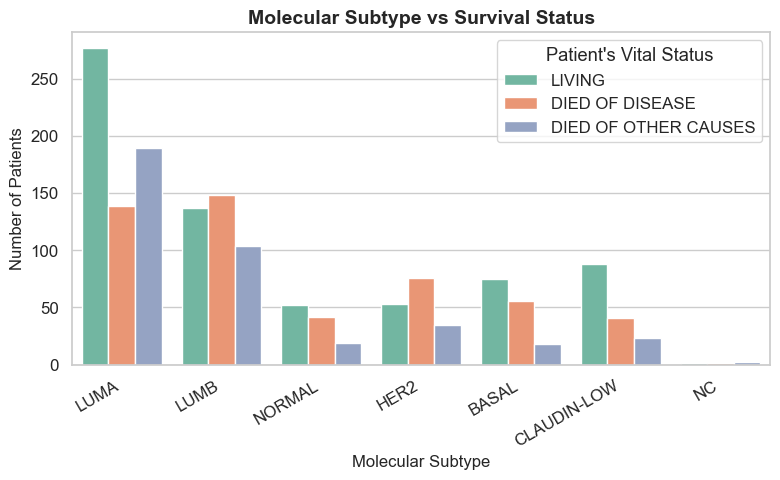

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt
# df["Pam50 + Claudin-low subtype"] = df["Pam50 + Claudin-low subtype"].replace("UNKNOWN", "Not Reported")
# Set the plot style
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

# Plot Molecular Subtype vs Overall Survival Status
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x="Pam50 + Claudin-low subtype", hue="Patient's Vital Status", palette="Set2")


# Add title and labels
plt.title("Molecular Subtype vs Survival Status", fontsize=14, fontweight="bold")
plt.xlabel("Molecular Subtype", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
# Rotate subtype labels for readability
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
# plt.savefig("Molecular Subtype vs Survival Status.png", bbox_inches='tight')
plt.show()

#### **Observation**
* Comparing molecular subtype vs survival we observe that **Luminal A is associated with best survival status** (highest number of living patients) this  may suggest  that it respond well to  treatment

### **Molecular Subtype vs Chemotherapy**

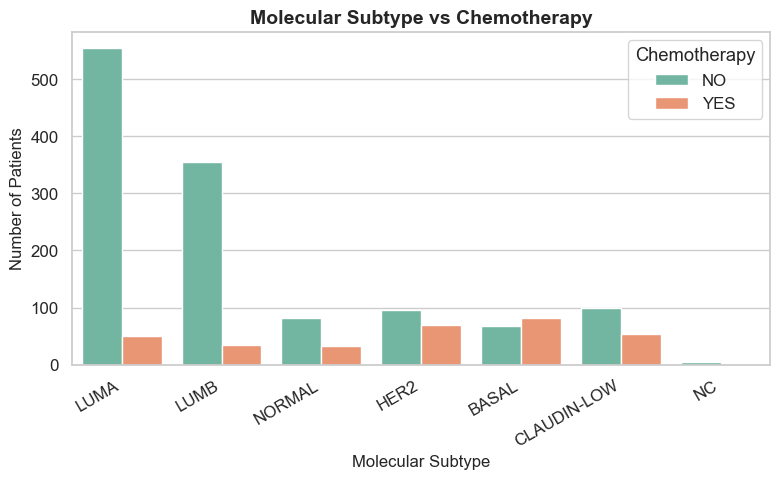

In [16]:


# Set the plot style
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

# Plot Molecular Subtype vs Chemotherapy
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x="Pam50 + Claudin-low subtype", hue="Chemotherapy", palette="Set2")

plt.title("Molecular Subtype vs Chemotherapy", fontsize=14, fontweight="bold")
plt.xlabel("Molecular Subtype", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
# Rotate subtype labels for readability
plt.xticks(rotation=30, ha="right")
# Adjust layout and show plot
plt.tight_layout()
# plt.savefig("Molecular Subtype vs Chemotherapy.png", bbox_inches='tight')
plt.show()


#### **Observation**
* Luminal A show the highest resistance to chemotherapy, indicating a low response rate to this type of treatment followed by Luminal B, 
while Basal and HER2 subtypes show good responsiveness to chemotherapy.

### **Molecular Subtype vs Hormone Therapy**

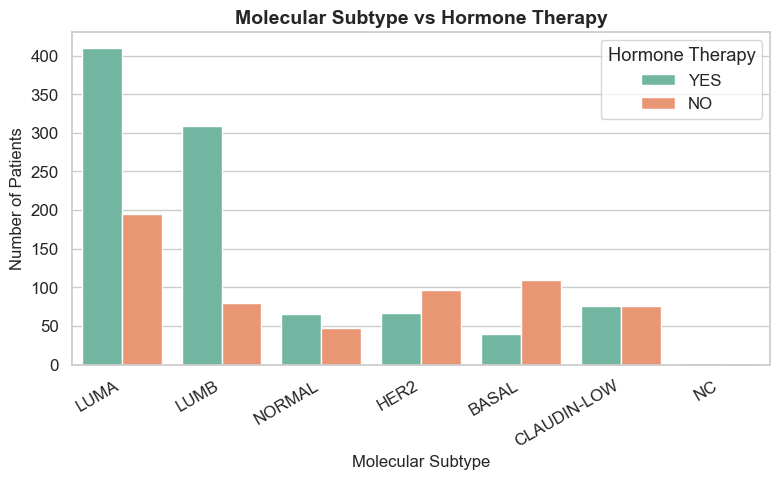

In [17]:

# Set the plot style
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

# Plot Molecular Subtype vs Chemotherapy
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x="Pam50 + Claudin-low subtype", hue="Hormone Therapy", palette="Set2")

plt.title("Molecular Subtype vs Hormone Therapy", fontsize=14, fontweight="bold")
plt.xlabel("Molecular Subtype", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
# Rotate subtype labels for readability
plt.xticks(rotation=30, ha="right")
# Adjust layout and show plot
plt.tight_layout()
# plt.savefig("Molecular Subtype vs Hormone Therapy.png", bbox_inches='tight')
plt.show()


#### **Observation**
* Luminal A and Luminal B show the best response to hormone therapy. These Pam50 subtypes depend on estrogen or progesterone hormone to grow, and they are often  treated by blocking these hormones

### **Molecular Subtype vs Type of Breast Surgery**

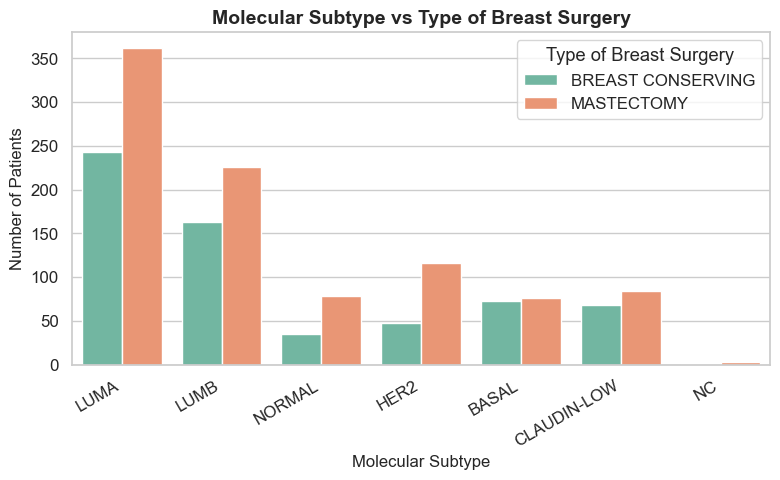

In [18]:

# Set the plot style
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

# Plot Molecular Subtype vs Chemotherapy
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x="Pam50 + Claudin-low subtype", hue="Type of Breast Surgery", palette="Set2")

plt.title("Molecular Subtype vs Type of Breast Surgery", fontsize=14, fontweight="bold")
plt.xlabel("Molecular Subtype", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
# Rotate subtype labels for readability
plt.xticks(rotation=30, ha="right")
# Adjust layout and show plot
plt.tight_layout()
plt.show()


### **ER/PR Status VS Survival rate**

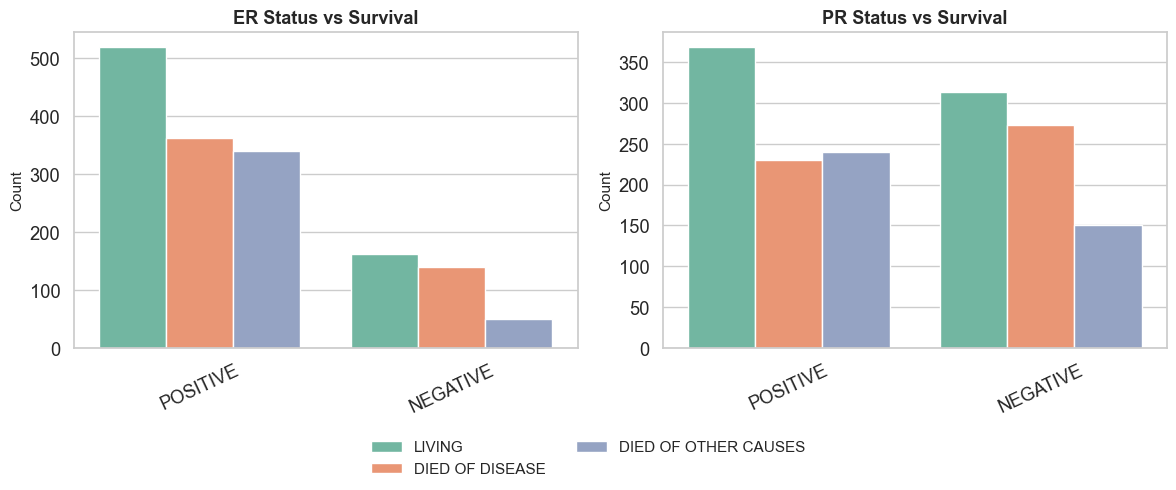

In [19]:

# Set a clean, presentation-friendly style
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

# Create 2 subplots for ER and PR
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define consistent hue order for clarity
hue_order = ["Alive", "Dead"] if "Alive" in df["Patient's Vital Status"].unique() else None

# Plot ER and PR
sns.countplot(data=df, x="ER Status", hue="Patient's Vital Status", ax=axes[0], hue_order=hue_order)
sns.countplot(data=df, x="PR Status", hue="Patient's Vital Status", ax=axes[1], hue_order=hue_order)

# Titles
axes[0].set_title("ER Status vs Survival", fontsize=13, fontweight="bold")
axes[1].set_title("PR Status vs Survival", fontsize=13, fontweight="bold")

# Axis labels and style
for ax in axes:
    ax.set_xlabel("")
    ax.set_ylabel("Count", fontsize=11)
    ax.tick_params(axis="x", rotation=25)
    ax.legend_.remove()  # remove individual legends

# Add one combined legend below both plots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=2, fontsize=11, frameon=False)

# Adjust layout for presentation
plt.tight_layout(rect=[0, 0.1, 1, 1])
fig.patch.set_facecolor("white")

# Save 
# plt.savefig("ER_PR_Status_vs_Survival.png", dpi=400, bbox_inches="tight", facecolor="white")

plt.show()


#### **Observation**
* There is a massive gap between Living patients and patients who died of disease for ER+,PR+ in other words, the number of patients 
who died of the disease is low for these hormone receptors compared to the living patients bar. Indicating that ER+,PR+ have the higher survival rates 
compared to ER-,PR- which are associated with poor prognosis.

### **Tumor Stage vs Survival Status**

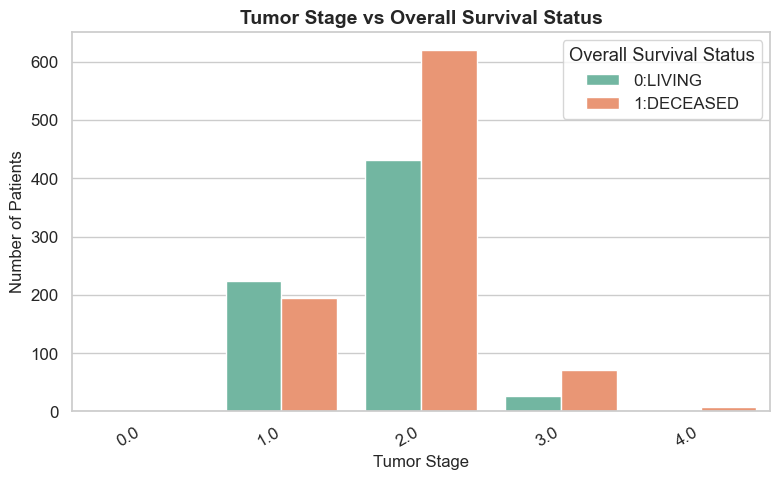

In [20]:
# Clean up 'Tumor Stage' values
# df["Tumor Stage"] = df["Tumor Stage"].replace("UNKNOWN", "Not Reported")

# Set the plot style
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

# Plot Tumor Stage vs Overall Survival Status
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x="Tumor Stage", hue="Overall Survival Status", palette="Set2")

# Add title and labels
plt.title("Tumor Stage vs Overall Survival Status", fontsize=14, fontweight="bold")
plt.xlabel("Tumor Stage", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)

# Rotate x-tick labels if needed
plt.xticks(rotation=30, ha="right")

# Adjust layout and show
plt.tight_layout()
# plt.savefig("Tumor Stage vs Overall Survival Status.png", bbox_inches='tight')

plt.show()


#### **Observation**
* Lower stages (0 and 1) have better survival rates compared to higher stages(2 and 3) 

### **Age at Diagnosis vs Survival**

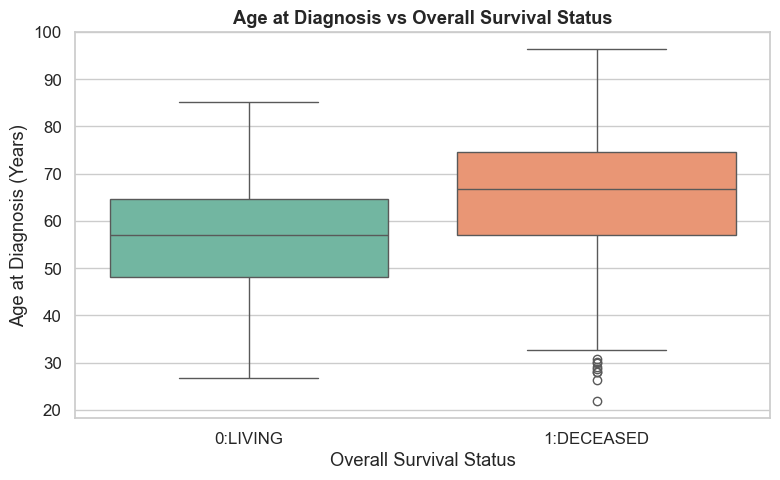

In [21]:
order = [cat for cat in df["Overall Survival Status"].unique() if cat != "Not Reported"]

# Remove missing or invalid ages
df_filtered = df[df["Age at Diagnosis"].notna()]

# Set the plot style
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

# Plot Age at Diagnosis vs Overall Survival Status
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df_filtered, x="Overall Survival Status", y="Age at Diagnosis", palette="Set2", hue="Overall Survival Status", legend=False)

# Add title and labels
plt.title("Age at Diagnosis vs Overall Survival Status", fontweight="bold")
plt.xlabel("Overall Survival Status")
plt.ylabel("Age at Diagnosis (Years)")

# Improve layout and show
plt.tight_layout()
# plt.savefig("Age at Diagnosis vs Overall Survival Status.png", bbox_inches="tight")
plt.show()


#### **Observation**
* Most Deceased patients are of older age. From the plot there are some outliers for the DECEASED class suggesting that there is lower survival rates for some younger women (under 39) and older  women(70 and above)
and highest survival rates for middle-aged women (45-70).

### **Inferred Menopausal State vs ER/PR/HER2 Status**

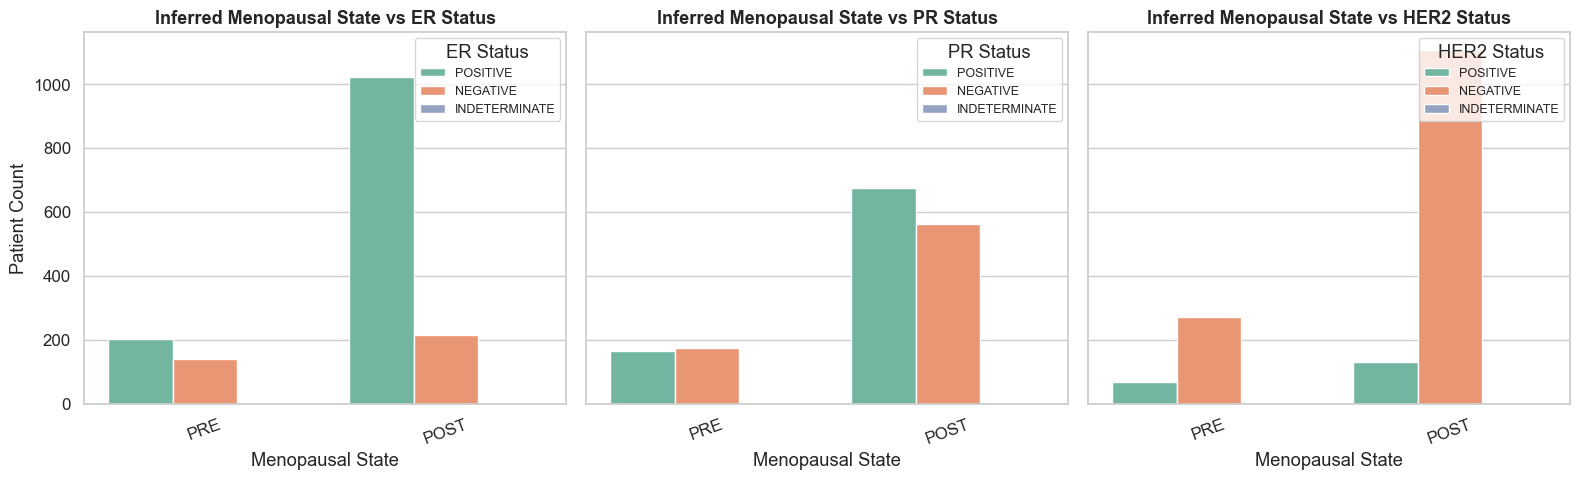

In [22]:
# Set style 
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

# Receptor columns 
receptor_cols = ["ER Status", "PR Status", "HER2 Status"]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)

# Plot each receptor
for ax, receptor in zip(axes, receptor_cols):
    sns.countplot(data=df_filtered, x="Inferred Menopausal State", hue=receptor, palette="Set2",hue_order=["POSITIVE", "NEGATIVE", "INDETERMINATE"],ax=ax)
    
    ax.set_title(f"Inferred Menopausal State vs {receptor}", fontsize=13, fontweight="bold")
    ax.set_xlabel("Menopausal State")
    ax.set_ylabel("Patient Count")
    ax.legend(title=receptor, loc="upper right", fontsize=9)
    ax.tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()


#### **Observation**
* Postmenopausal women are more likely to have ER+ and PR+, these hormone receptor positive cancers are often responsive to hormone therapies 
hence they have better prognosis, while Premenopausal women(younger) are more likely to have ER- and PR-, which are more aggressive and have poorer
prognosis.

### **Neoplasm Histologic Grade vs Overall Survival Status**

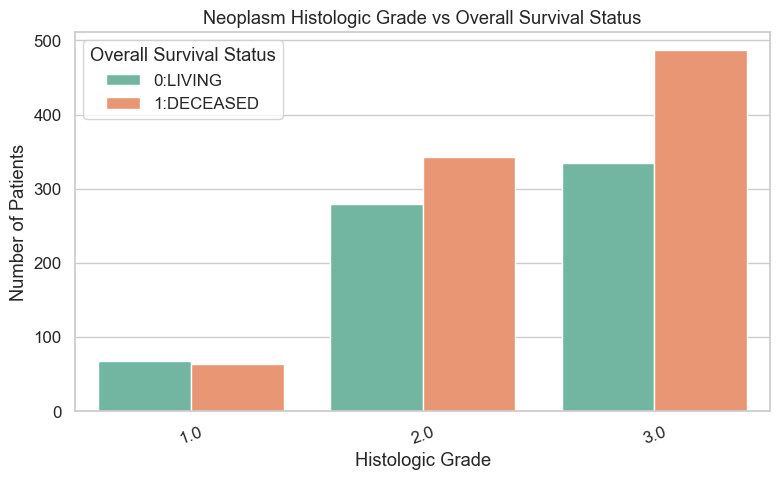

In [23]:
# Filter out missing or unknown grades
df_filtered = df[df["Neoplasm Histologic Grade"].notna()]

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df_filtered, x="Neoplasm Histologic Grade", hue="Overall Survival Status", palette="Set2")

plt.title("Neoplasm Histologic Grade vs Overall Survival Status")
plt.xlabel("Histologic Grade")
plt.ylabel("Number of Patients")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


#### **Observation**
* High grade tumors i.e 3 from the plot have the highest number of DECEASED patients compared to low grade tumor (1) indicating that high grade tumors
generally have a worse prognosis and shorter survival compared to low grade tumor.

### **Chemotherapy / Hormone Therapy / Surgery Type vs Survival**

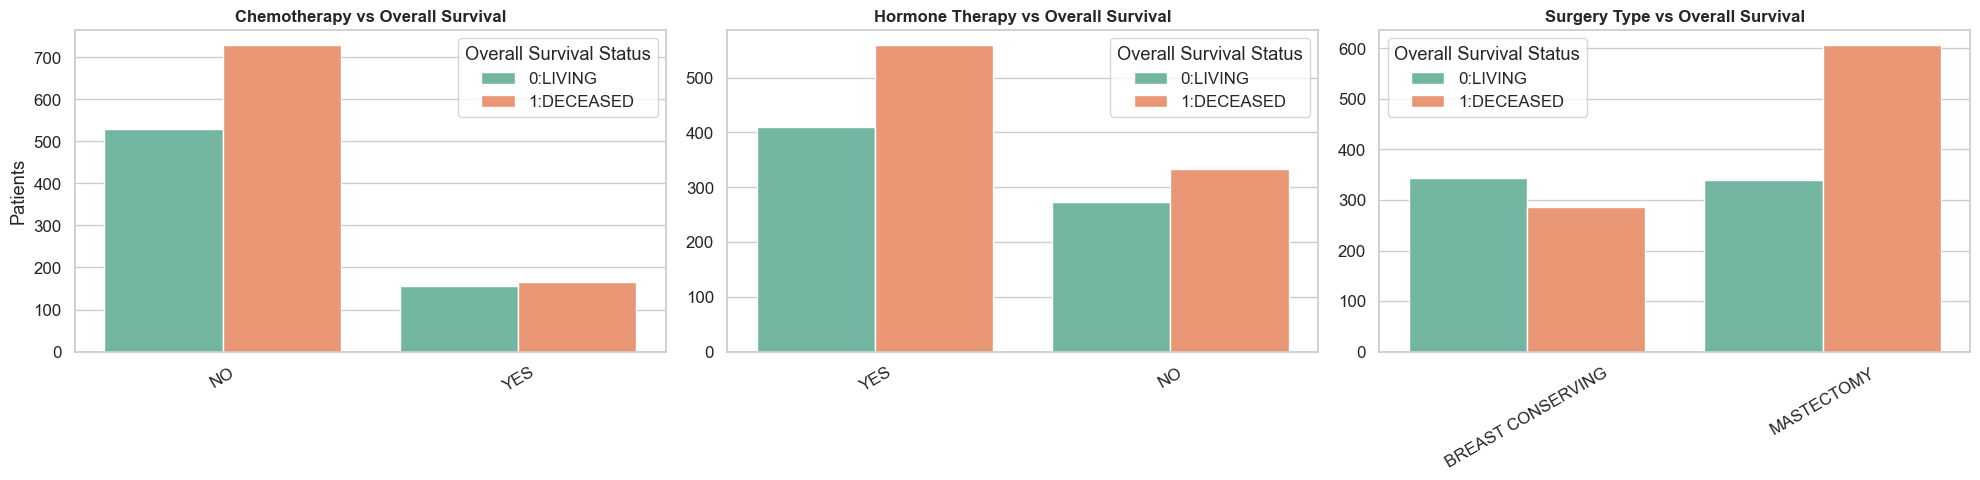

In [24]:

# Replace UNKNOWNs with Not Reported
df["Chemotherapy"] = df["Chemotherapy"].replace("UNKNOWN", "Not Reported")
df["Hormone Therapy"] = df["Hormone Therapy"].replace("UNKNOWN", "Not Reported")
df["Type of Breast Surgery"] = df["Type of Breast Surgery"].replace("UNKNOWN", "Not Reported")

# Set plot style
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Chemotherapy vs Survival
sns.countplot(data=df, x="Chemotherapy", hue="Overall Survival Status", palette="Set2", ax=axes[0])
axes[0].set_title("Chemotherapy vs Overall Survival", fontsize=12, fontweight="bold")
axes[0].set_xlabel("")
axes[0].set_ylabel("Patients")
axes[0].tick_params(axis='x', rotation=30)

# Hormone Therapy vs Survival
sns.countplot(data=df, x="Hormone Therapy", hue="Overall Survival Status", palette="Set2", ax=axes[1])
axes[1].set_title("Hormone Therapy vs Overall Survival", fontsize=12, fontweight="bold")
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].tick_params(axis='x', rotation=30)

# Surgery Type vs Survival
sns.countplot(data=df, x="Type of Breast Surgery", hue="Overall Survival Status", palette="Set2", ax=axes[2])
axes[2].set_title("Surgery Type vs Overall Survival", fontsize=12, fontweight="bold")
axes[2].set_xlabel("")
axes[2].set_ylabel("")
axes[2].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


#### **Observation**
* Most patients who did not receive chemotherapy are deceased,  the number of deceased patients is lower for patients who received chemotherapy suggesting that chemotherapy have a positive impact on survival status.
* A higher number of patients who received hormone therapy are alive compared to those who did not, even though the deceased is high in both classes
its safe to say hormone therapy has a positive impact on survival for some types of breast cancers.
* Mastectomy group show more deceased than living this may indicate advanced stages of breast cancer. Breast conserving surgery group shows a balanced count between living and deceased this may suggest that breast conserving surgery combined with other appropriate treatments approach results to better survival.

### **Correlation status for Numeric columns**

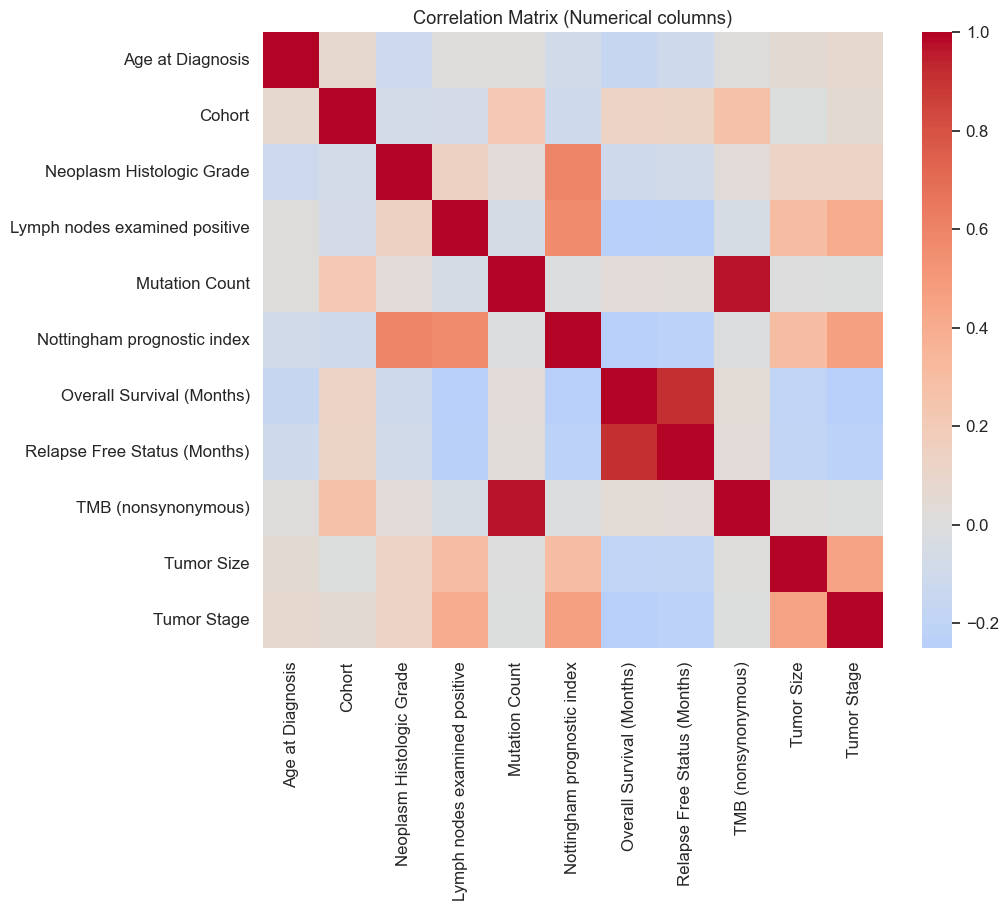

In [25]:
# plot
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', center=0)
plt.title("Correlation Matrix (Numerical columns)")
plt.show()



In [26]:
# Correlation of numerical features
df.corr(numeric_only=True)


,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),TMB (nonsynonymous),Tumor Size,Tumor Stage
Age at Diagnosis,1.000000,0.074690,-0.116345,0.011488,0.016926,-0.086471,-0.155173,-0.099150,0.011682,0.050922,0.080587
Cohort,0.074690,1.000000,-0.071256,-0.064740,0.232778,-0.100328,0.132976,0.116262,0.268062,0.001363,0.050023
Neoplasm Histologic Grade,-0.116345,-0.071256,1.000000,0.144699,0.036243,0.594968,-0.105238,-0.089669,0.033505,0.127073,0.126444
Lymph nodes examined positive,0.011488,-0.064740,0.144699,1.000000,-0.056731,0.565130,-0.248155,-0.244586,-0.049372,0.299847,0.401691
Mutation Count,0.016926,0.232778,0.036243,-0.056731,1.000000,-0.008043,0.036274,0.023798,0.969700,0.007701,-0.004041
Nottingham prognostic index,-0.086471,-0.100328,0.594968,0.565130,-0.008043,1.000000,-0.250549,-0.222660,-0.014240,0.296974,0.462662
Overall Survival (Months),-0.155173,0.132976,-0.105238,-0.248155,0.036274,-0.250549,1.000000,0.905177,0.047098,-0.197327,-0.248690
Relapse Free Status (Months),-0.099150,0.116262,-0.089669,-0.244586,0.023798,-0.222660,0.905177,1.000000,0.038016,-0.186299,-0.224690
TMB (nonsynonymous),0.011682,0.268062,0.033505,-0.049372,0.969700,-0.014240,0.047098,0.038016,1.000000,0.010810,0.000544
Tumor Size,0.050922,0.001363,0.127073,0.299847,0.007701,0.296974,-0.197327,-0.186299,0.010810,1.000000,0.451959


**Summary of Correlation Findings**

* Mutation Count and TMB (nonsynonymous) = 0.96
-Extremely strong positive correlation 

* Overall Survival (Months) and Relapse Free Status (Months) = 0.82
Strong positive correlation — longer survival is associated with longer relapse-free duration.

* Neoplasm Histologic Grade and Nottingham prognostic index = 0.55

* Tumor Stage and Tumor Size = 0.40

* Lymph nodes examined positive and Tumor Stage = 0.34



In [27]:
# highly correlared columns to avoid multi-collinearity
df = df.drop(columns=["Mutation Count"])
df = df.drop(columns=["Relapse Free Status (Months)", "Relapse Free Status"])
df = df.drop(columns=["Overall Survival (Months)"])

# **Modeling**

### a)  **Molecular subtype prediction**

* **Goal:** Classify tumors into molecular subtypes using clinical and genetic features.

By predicting these subtypes our model will:
1. Help doctors estimate the tumor’s molecular subtype without needing the actual PAM50 genetic test.
2. Give insights into how aggressive or treatable a tumor might be.
3. Guide treatment decisions.


In [28]:
# Import relevant libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

In [29]:
df["Pam50 + Claudin-low subtype"].value_counts()

Pam50 + Claudin-low subtype
LUMA           605
LUMB           389
HER2           164
CLAUDIN-LOW    152
BASAL          149
NORMAL         113
NC               4
Name: count, dtype: int64

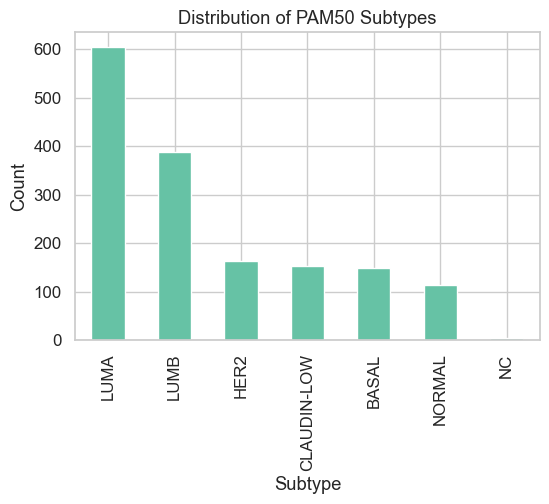

In [30]:
# Check the distribution of the target column "Pam50 + Claudin-low subtype"


# Visualize the class distribution of "Pam50 + Claudin-low subtype"
df["Pam50 + Claudin-low subtype"].value_counts().plot(kind='bar', figsize=(6,4))

plt.title("Distribution of PAM50 Subtypes")
plt.xlabel("Subtype")
plt.ylabel("Count")
plt.show()


In [31]:
# Exlude the class with low values
df = df[df["Pam50 + Claudin-low subtype"] != "NC"]
df["Pam50 + Claudin-low subtype"].value_counts()

Pam50 + Claudin-low subtype
LUMA           605
LUMB           389
HER2           164
CLAUDIN-LOW    152
BASAL          149
NORMAL         113
Name: count, dtype: int64

In [32]:
# target and features 

y = df['Pam50 + Claudin-low subtype']
X = df.drop(columns=['Pam50 + Claudin-low subtype'])


In [33]:
# LabelEncode the target column because it is a multi-class classification
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [34]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [35]:
# Filter columns
categorical_cols = [col for col in categorical_cols if col in X_train.columns]
numerical_cols = [col for col in numerical_cols if col in X_train.columns]

In [36]:
# One-Hot Encode categorical features & standard scale numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
])

In [38]:
import joblib

# SMOTE for class balancing
smote = SMOTE(random_state=42, k_neighbors=2)

# Classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Build pipeline
pipelineRF = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', rf)
])
#pipelineRF.fit(X_train, y_train)

# Hyperparameter grid for Random Forest
param_grid = {
    'classifier__n_estimators': [100, 150],
    'classifier__max_depth': [None, 10],
    'classifier__min_samples_split': [2, 3],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__max_features': ['log2']
}


# GridSearchCV with 3-fold cross-validation
grid_search_RF = GridSearchCV(pipelineRF, param_grid, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=2)

# Fit GridSearch
grid_search_RF.fit(X_train, y_train)

# Get the best model
best_RF = grid_search_RF.best_estimator_

print("Best Parameters:", grid_search_RF.best_params_)

joblib.dump(best_RF, "molecular_subtype_model.joblib")
print("Full pipeline (with preprocessor) saved successfully.")


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'classifier__max_depth': None, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 150}
Full pipeline (with preprocessor) saved successfully.


Accuracy: 0.6698412698412698

Classification Report:
               precision    recall  f1-score   support

       BASAL       0.53      0.70      0.60        30
 CLAUDIN-LOW       0.53      0.33      0.41        30
        HER2       0.64      0.48      0.55        33
        LUMA       0.79      0.77      0.78       121
        LUMB       0.62      0.86      0.72        78
      NORMAL       0.67      0.17      0.28        23

    accuracy                           0.67       315
   macro avg       0.63      0.55      0.56       315
weighted avg       0.67      0.67      0.65       315



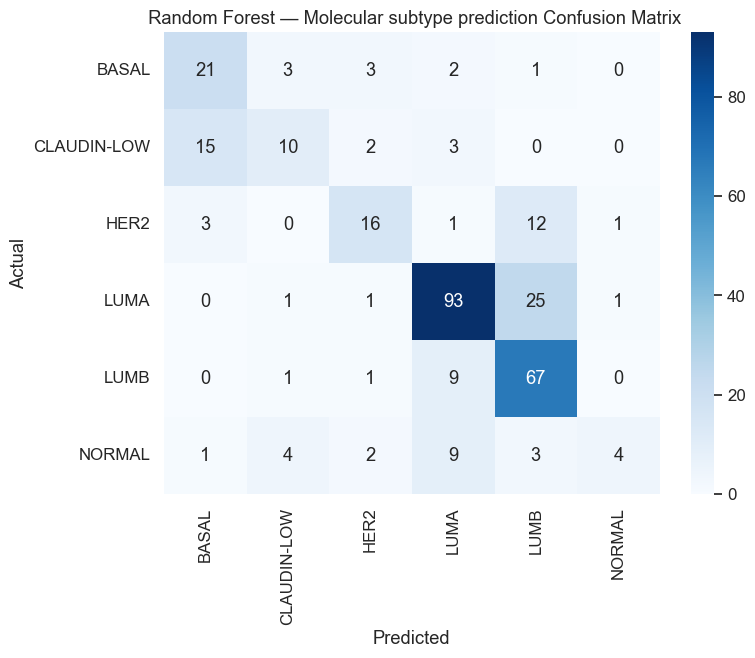

In [39]:

# Predict on test set
y_pred = grid_search_RF.predict(X_test)


# Evaluation

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(" Random Forest — Molecular subtype prediction Confusion Matrix")
#plt.savefig("Molecular subtype prediction cm.png")
plt.show()


* **The confusion matrix shows that the random forest model performs best at identifying Luminal A and Luminal B subtypes with highest correct prediction of 93 and 67 respectively.**

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on test set
y_pred = grid_search_RF.predict(X_test)

# Compute accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

# Compute weighted precision
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
print("Precision: {:.2f}%".format(prec * 100))

# Compute weighted recall
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
print("Recall: {:.2f}%".format(rec * 100))

# Compute weighted F1 score
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
print("F1 Score: {:.2f}%".format(f1 * 100))


Accuracy: 66.98%
Precision: 67.48%
Recall: 66.98%
F1 Score: 65.25%


#### **Random Forest Feature importance**

In [41]:

importances = best_RF.named_steps['classifier'].feature_importances_
cat_features = best_RF.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = list(cat_features) + numerical_cols

feature_importance_RF = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Top 15 features
feature_importance_RF.head(15)

,Feature,Importance
56,3-Gene classifier subtype_ER-/HER2-,0.060028
55,3-Gene classifier subtype_ER+/HER2- LOW PROLIF,0.054417
54,3-Gene classifier subtype_ER+/HER2- HIGH PROLIF,0.046187
14,ER Status_POSITIVE,0.043754
66,TMB (nonsynonymous),0.041382
61,Age at Diagnosis,0.038353
29,Integrative Cluster_10,0.037930
65,Nottingham prognostic index,0.034093
67,Tumor Size,0.032969
13,ER Status_NEGATIVE,0.032960


* The top most features that influence Pam50 + Claudin-low subtypes prediction for Random Forest are 3-Gene Classifier Subtype (ER+/HER2− High/Low Proliferation), ER Status (Positive/Negative),  Integrative Cluster 10, Tumor Mutation Burden (TMB) and Nottingham prognostic index, Age at Diagnosis
* Lets try and build a XGBoost model and see if our performance increases.

In [42]:

# Preprocessor for categorical and numeric features
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

# SMOTE for class balancing
smote = SMOTE(random_state=42, k_neighbors=2)

# XGBoost Classifier
xgb = XGBClassifier(objective='multi:softprob', eval_metric='mlogloss',random_state=42, n_jobs=-1)

# Pipeline
pipelineXGB = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', xgb)
])

# Hyperparameter grid
paramX_grid = {
    'classifier__n_estimators': [100, 150],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__subsample': [0.8],
    'classifier__colsample_bytree': [0.8]
}

# GridSearchCV
grid_search_XGB = GridSearchCV(pipelineXGB, paramX_grid, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=2)

# Fit GridSearch
grid_search_XGB.fit(X_train, y_train)

# Get the best model
best_XGB = grid_search_XGB.best_estimator_
print("Best Parameters:", grid_search_XGB.best_params_)

# Predict
y_pred = grid_search_XGB.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 150, 'classifier__subsample': 0.8}
Accuracy: 0.6476190476190476
              precision    recall  f1-score   support

       BASAL       0.49      0.70      0.58        30
 CLAUDIN-LOW       0.55      0.37      0.44        30
        HER2       0.59      0.39      0.47        33
        LUMA       0.84      0.71      0.77       121
        LUMB       0.58      0.87      0.69        78
      NORMAL       0.50      0.22      0.30        23

    accuracy                           0.65       315
   macro avg       0.59      0.54      0.54       315
weighted avg       0.66      0.65      0.64       315



In [43]:
# accuracy_score, precision_score, recall_score, f1_score

# Compute accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

# Compute weighted precision
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
print("Precision: {:.2f}%".format(prec * 100))

# Compute weighted recall
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
print("Recall: {:.2f}%".format(rec * 100))

# Compute weighted F1 score
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
print("F1 Score: {:.2f}%".format(f1 * 100))



Accuracy: 64.76%
Precision: 66.39%
Recall: 64.76%
F1 Score: 63.64%


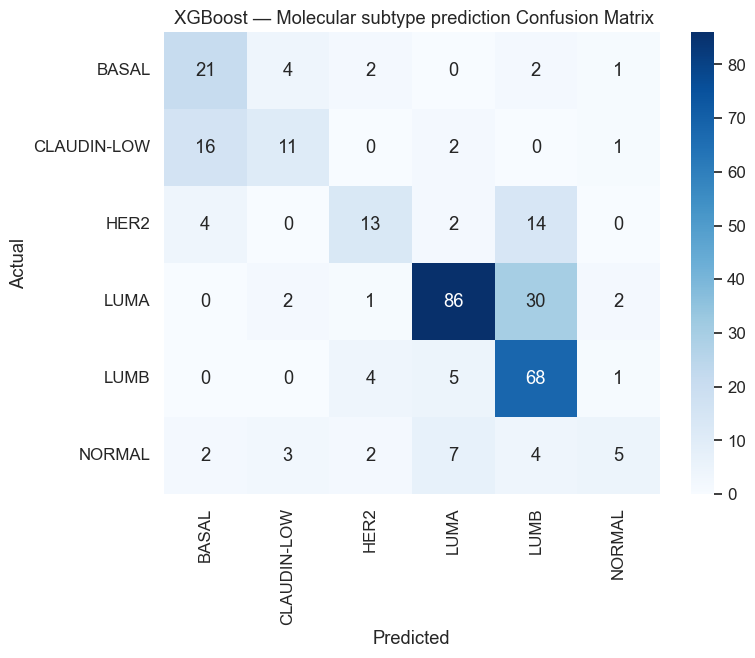

In [44]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(" XGBoost — Molecular subtype prediction Confusion Matrix")
# plt.savefig("Molecular subtype prediction cm.png")
plt.show()

* The XGBoost model accurately captures 86 Luminal A and 68 Luminal B subtypes

In [45]:
# Feature importance
importances = best_XGB.named_steps['classifier'].feature_importances_
cat_features = best_XGB.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = list(cat_features) + numerical_cols

feature_importance_XGB = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Top 15 features
feature_importance_XGB.head(15)

,Feature,Importance
15,HER2 Status_NEGATIVE,0.108126
29,Integrative Cluster_10,0.107759
55,3-Gene classifier subtype_ER+/HER2- LOW PROLIF,0.088384
54,3-Gene classifier subtype_ER+/HER2- HIGH PROLIF,0.072437
16,HER2 Status_POSITIVE,0.063934
56,3-Gene classifier subtype_ER-/HER2-,0.056691
14,ER Status_POSITIVE,0.026149
13,ER Status_NEGATIVE,0.024647
9,Cellularity_LOW,0.020949
32,Integrative Cluster_4ER+,0.018471


* The top most features that influence Pam50 + Claudin-low subtypes prediction for XGBoost are HER2 Status (Positive/Negative), Integrative Cluster (10, 3), 3-Gene Classifier Subtype (ER+/HER2− High/Low Proliferation).                                                                           

#### **Molecular Subtype Prediction Random Forest vs. XGBoost models comparison**

* Random Forest has an Accuracy of 67%, Macro F1-score of 56%
* XGBoost, Accuracy: 67%, Macro F1-score: 54%
Random Forest is the Best performing model (higher macro F1 = 0.56). We compare using Macro F1-score because the classes are imbalanced and we desire
to treat each classes equallypes.


### **INTERPRETATION**
* The Random Forest model mainly relied on features such as ER Status, 3-Gene classifier subtype (ER+/HER2- HIGH and LOW PROLIF), Cellularity, and Integrative Cluster_10. This indicates that the model effectively identifies breast cancer molecular subtypes using information similar to what clinicians already apply in practice such as hormone receptor expression, tumor cell activity, growth rate, and molecular grouping
* The XGBoost model placed the greatest emphasis on HER2 Status, Integrative Cluster_10, 3-Gene classifier subtypes, Patient’s Vital Status, Tumor Histologic Subtype and Cellularity.
* Overally the Random Forest model captures more complex molecular relationships providing a deeper understanding of how certain breast cancer subtypes behave clinically.

## **CLINICAL INSIGHT**
* Random Forest is the stronger model, giving more accurate and clinically meaningful predictions of breast cancer subtypes.
* Clinicians can use it to estimate a tumor’s subtype without needing the expensive PAM50 genetic test.
* Important predictors like HER2 Status, ER Status, and 3-Gene subtype reflect real biological behavior helping estimate 
how aggressive or treatable a tumor might be.
* This approach could support faster and more affordable treatment decisions, especially in hospitals without access to full genetic testing.

### b) **Survival Status Prediction model**

* Build a model that Predict whether a patient is **alive or deceased.** it will:
1. Help identify high-risk patients who may need closer monitoring or aggressive therapy.
2. Provide insights into prognostic factors associated with survival.
3. Assist in treatment planning and patient counselling.

In [46]:
# check the distribution of our target column
df['Overall Survival Status'].value_counts()

Overall Survival Status
1:DECEASED    890
0:LIVING      682
Name: count, dtype: int64

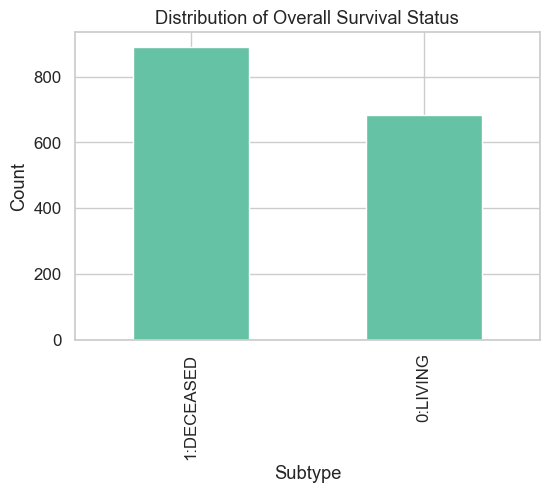

In [48]:
# Visualize the class distribution of Overall Survival Status column
df['Overall Survival Status'].value_counts().plot(kind='bar', figsize=(6,4))

plt.title("Distribution of Overall Survival Status")
plt.xlabel("Subtype")
plt.ylabel("Count")
plt.show()


In [49]:
# Create feature and target DataFrames
y_binary = df["Overall Survival Status"]
X_binary = df.drop(columns=["Overall Survival Status","Patient's Vital Status"])

In [50]:
# Used regex to extract numeric part from target strings ("1:DECEASED", 0:LIVING)
y_binary = y_binary.str.extract(r'(\d+)').astype(int)[0]



In [51]:
# train test split in test size of 80
X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(X_binary, y_binary, test_size=0.2, stratify=y_binary, random_state=42)
    


In [52]:
# Filter columns
categorical_cols = [col for col in categorical_cols if col in X_binary_train.columns]
numerical_cols = [col for col in numerical_cols if col in X_binary_train.columns]

In [53]:
# One-Hot Encode categorical features & standard scale categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numerical_cols)])

In [54]:

# SMOTE for class balancing
smote = SMOTE(random_state=42)

# Define the pipeline
pipelinelr= ImbPipeline([
    ("preprocessor", preprocessor),
    ("smote", smote),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])


# Tuning hyperparameter grid
param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10, 100],
    "classifier__penalty": ["l2"],
    "classifier__solver": ["lbfgs", "liblinear"]
}

# GridsearchCV
gridsearch_LR = GridSearchCV(estimator=pipelinelr, param_grid=param_grid, scoring="accuracy", cv=3, n_jobs=-1, verbose=2)

# fit the train data
gridsearch_LR.fit(X_binary_train, y_binary_train)

best_lr = gridsearch_LR.best_estimator_

# Make predictions
y_pred_lr = best_lr.predict(X_binary_test)
y_pred_proba_lr = best_lr.predict_proba(X_binary_test)[:, 1]


Fitting 3 folds for each of 10 candidates, totalling 30 fits


Accuracy: 0.6888888888888889

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.66      0.65       137
           1       0.73      0.71      0.72       178

    accuracy                           0.69       315
   macro avg       0.68      0.69      0.69       315
weighted avg       0.69      0.69      0.69       315

ROC-AUC: 0.7678176002624456


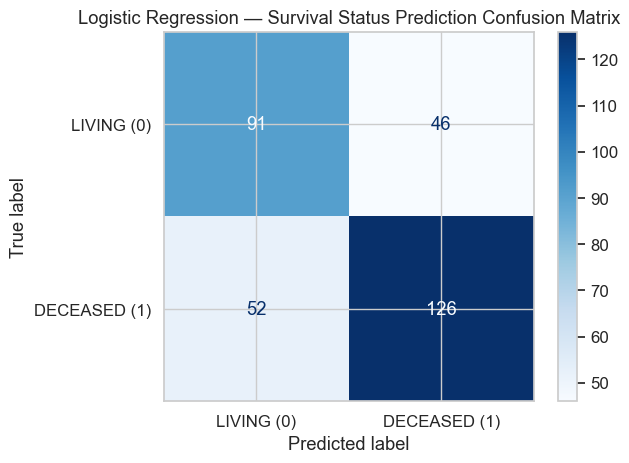

In [55]:
 from sklearn.metrics import (accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay, roc_auc_score)
# Evaluation

# Metrics
print("Accuracy:", accuracy_score(y_binary_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_binary_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_binary_test, y_pred_proba_lr))

# Confusion matrix
cm = confusion_matrix(y_binary_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["LIVING (0)", "DECEASED (1)"])
disp.plot(cmap="Blues")
plt.title("Logistic Regression — Survival Status Prediction Confusion Matrix")
plt.show()



* Accuracy of 0.69, the Logistic Regression model correctly predicts 69% of the cases. 
* The model is performing better at predicting deceased patients class 1.  DECEASED patients (73% precision) then LIVING patients (64% precision).
* The model is learning meaningful patterns: ROC-AUC of 0.739 shows decent ability to distinguish classes.
* From the confusion matrix the model correctly detects 126 Deceased patients and correctly detects 91 living patients

   

### The top important features for  predicting survival status(binary)

In [56]:

# Get the fitted preprocessor from the best model
fitted_preprocessor = best_lr.named_steps['preprocessor']

# Get categorical feature names
cat_features = fitted_preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine with numeric features
all_features = list(cat_features) + numerical_cols

# Extract logistic regression coefficients
coefficients = best_lr.named_steps['classifier'].coef_[0]

# Create a DataFrame
feature_importance = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': coefficients
})

# Sort by absolute value
feature_importance['Abs_Coeff'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coeff', ascending=False)

# Show top 15
feature_importance.head(15)



,Feature,Coefficient,Abs_Coeff
34,Integrative Cluster_5,1.033835,1.033835
56,Age at Diagnosis,1.016405,1.016405
29,Integrative Cluster_10,-0.860155,0.860155
55,3-Gene classifier subtype_HER2+,-0.774401,0.774401
35,Integrative Cluster_6,0.638213,0.638213
54,3-Gene classifier subtype_ER-/HER2-,0.516780,0.516780
27,Inferred Menopausal State_PRE,0.487284,0.487284
26,Inferred Menopausal State_POST,-0.471630,0.471630
28,Integrative Cluster_1,-0.463236,0.463236
23,Tumor Other Histologic Subtype_TUBULAR/ CRIBRI...,-0.382671,0.382671




#### Logistic Regression insights on predicting survival status

1. **Age at Diagnosis** is a major influence on survival
2. **Type of Breast Cancer** and **Patient Cluster (Integrative Cluster)** have a big impact on survival:
* Mixed Ductal and Lobular cancers (**BREAST MIXED DUCTAL** and **LOBULAR CARCINOMA**)  are associated with a higher risk of death compared to pure breast cancers i.e Invasive Ductal Carcinoma, Invasive Lobular Carcinoma.
* Integrative Clusters also influence survival status
3. How many **lymph nodes** affected in patients body also influence survival — more affected lymph nodes leads a higher risk of death. 
4. **Menopausal Status** and **Molecular Markers** also influence survival:
* Pre-menopausal patients have slightly higher risk of not surviving compared to Post-menopausal patients.




**Lets build a more advanced model to see if it will performance better**

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}

 Test Set Performance:
Accuracy: 0.726984126984127
ROC-AUC: 0.7860452718773067

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.67      0.68       137
           1       0.75      0.77      0.76       178

    accuracy                           0.73       315
   macro avg       0.72      0.72      0.72       315
weighted avg       0.73      0.73      0.73       315



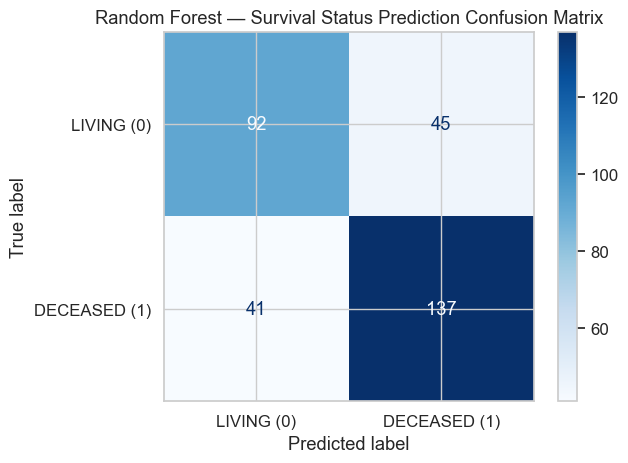

Full pipeline (with preprocessor) saved successfully.


In [57]:
# Random Forest Classifier for Binary Survival

# SMOTE for class balancing
smote = SMOTE(random_state=42)

# pipeline
rf_pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", smote),
    ("classifier", RandomForestClassifier(random_state=42, class_weight="balanced"))
])

#rf_pipeline.fit(X_binary_train, y_binary_train)

# Define hyperparameter grid
param_grid_rf = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [None, 5],
    "classifier__min_samples_split": [2, 3],
    "classifier__min_samples_leaf": [1, 2, 3]
}

# GridSearchCV setup
gridsearch_rf = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid_rf, scoring="accuracy", cv=5,n_jobs=-1,verbose=2)


# Fit on training data
gridsearch_rf.fit(X_binary_train, y_binary_train)


# Get the best model
best_rf = gridsearch_rf.best_estimator_
print("Best Parameters:", gridsearch_rf.best_params_)


# Predict on test set
y_pred_rf = best_rf.predict(X_binary_test)
y_pred_proba_rf = best_rf.predict_proba(X_binary_test)[:, 1]


# Evaluation
print("\n Test Set Performance:")
print("Accuracy:", accuracy_score(y_binary_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_binary_test, y_pred_proba_rf))
print("\nClassification Report:\n", classification_report(y_binary_test, y_pred_rf))

# Confusion matrix
cm = confusion_matrix(y_binary_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["LIVING (0)", "DECEASED (1)"])
disp.plot(cmap="Blues")
plt.title("Random Forest — Survival Status Prediction Confusion Matrix")
# plt.savefig("Survival Status cm.png")
plt.show()


joblib.dump(best_rf, "survival_status_model.joblib")
print("Full pipeline (with preprocessor) saved successfully.")

* There is an improvement, Random Forest model achieves 73% accuracy, correctly predicting 73% of cases. 
* It performs better at predicting deceased patients (75% precision) than living patients (69% precision).
* From the confusion matrix we the model correctly detects 137 deceased patients and 92 living patients 
* With a ROC-AUC of 0.786, it shows good ability to distinguish classes

In [59]:
# Feature importance
importances = best_rf.named_steps['classifier'].feature_importances_
cat_features = best_rf.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = list(cat_features) + numerical_cols

feature_importance_rf = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Top 15 features
feature_importance_rf.head(15)

,Feature,Importance
56,Age at Diagnosis,0.182772
62,Tumor Size,0.087691
60,Nottingham prognostic index,0.085212
57,Cohort,0.076160
61,TMB (nonsynonymous),0.061840
59,Lymph nodes examined positive,0.045769
1,Type of Breast Surgery_MASTECTOMY,0.020063
58,Neoplasm Histologic Grade,0.019326
0,Type of Breast Surgery_BREAST CONSERVING,0.019021
63,Tumor Stage,0.018352


### **OBSERVATIONS**
* Random Forest outperforms Logistic Regression across all metrics.
* Both models are better at predicting deceased patients than living patients, which is clinically important for identifying high-risk individuals.
* Random Forest’s higher ROC-AUC shows it can better capture complex interactions between clinical and molecular features.

### **INTERPRETATION**

**Logistic Regression**
* Relies mainly on features like Tumor Other Histologic Subtype (Metaplastic), Age at Diagnosis, Integrative Cluster_5, and 3-Gene classifier subtype (HER2+).
* It recognizes older age, aggressive tumor types, and high-risk molecular clusters as indicators of higher mortality.

**Random Forest**
* Puts higher importance on Age at Diagnosis, Nottingham Prognostic Index, Tumor Size, TMB, Lymph nodes examined positive, and Neoplasm Histologic Grade.
* This shows the model captures complex, it identifies that larger tumors, higher grade, more positive lymph nodes, older age, 
and molecular risk factors increase the likelihood of mortality.

### **Clinical Insight**
* Both models predict survival status, helping clinicians identify high-risk patients who may need more closer monitoring or intensive treatments.
* Random Forest is stronger. It provides more accurate predictions and better separates living vs deceased patients.
* Key prognostic factors are Tumor Stage, Neoplasm Grade, Lymph nodes positive, Age at Diagnosis, TMB, Integrative Cluster, 3-Gene classifier subtypes
* The models insights can assist oncologists in treatment planning, counseling, and prioritizing care.
* Supports personalized therapy decisions based on a patient’s risk profile.
* Logistic Regression remains interpretable, but Random Forest captures better patterns and interactions that reflect real-world clinical complexity.

### **Conclusion**

Compared to Logistic Regression, the Random Forest model is the better-performing tool for predicting survival in breast cancer patients. It can be used to:
* Spot high-risk patients random Forest’s higher accuracy in predicting the deceased class helps oncologists identify patients at higher risk, 
allowing for closer monitoring or more aggressive treatment, while avoiding unnecessary interventions for low-risk patients.
* Guide treatment decisions by analyzing influential predictors such as tumor size, age at diagnosis, Neoplasm Grade, Nottingham Prognostic Index, 
the model can suggest which patients might benefit most from treatments 
* Personalize patient care
* Support clinical decision-making: Random Forest’s strong predictive performance makes it a reliable tool for treatment planning, 
follow-up scheduling, and resource prioritization. Meanwhile, Logistic Regression remains valuable for its interpretability
providing clear insights into how each clinical feature contributes to survival.

In [60]:
df["Patient's Vital Status"].value_counts()

Patient's Vital Status
LIVING                  682
DIED OF DISEASE         502
DIED OF OTHER CAUSES    388
Name: count, dtype: int64

### **c) Vital Status Prediction (Living, Died of Disease, Died of Other Causes model)**

* This will help:
1. Distinguish cancer-related deaths from other causes
2. Reveals which clinical or molecular features are most associated with cancer-specific mortality.
3. Identify high-risk patients — knowing who is at risk of dying from cancer allows closer monitoring or more aggressive treatment.
4. Guide treatment and follow-up decisions


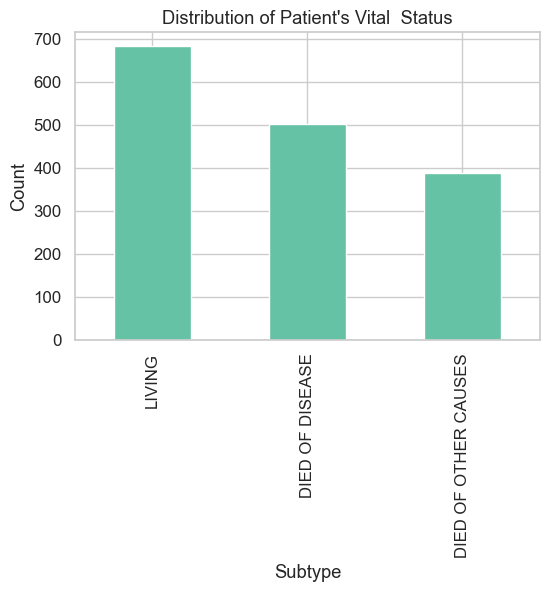

In [61]:
# Visualize the class distribution of Overall Survival Status column
df["Patient's Vital Status"].value_counts().plot(kind='bar', figsize=(6,4))

plt.title("Distribution of Patient's Vital  Status")
plt.xlabel("Subtype")
plt.ylabel("Count")
plt.show()


**To better understand whether a patient’s death was caused by cancer or by other factors, we built a multi-class model that predicts whether a patient is Living, Died of Disease, or Died of Other Causes.**

In [62]:
# Drop the unkown
df_multi = df["Patient's Vital Status"].value_counts()
df_multi

Patient's Vital Status
LIVING                  682
DIED OF DISEASE         502
DIED OF OTHER CAUSES    388
Name: count, dtype: int64

In [63]:

# Now features and target come from the same df
X_multi = df.drop(columns=["Patient's Vital Status", "Overall Survival Status"])
y_multi = df["Patient's Vital Status"]

# Label encode
le_multi = LabelEncoder()
y_multi_encoded = le_multi.fit_transform(y_multi)

# split
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(
    X_multi, y_multi_encoded, test_size=0.2, stratify=y_multi_encoded, random_state=42)

print("Training set:", X_multi_train.shape, y_multi_train.shape)
print("Testing set:", X_multi_test.shape, y_multi_test.shape)


Training set: (1257, 27) (1257,)
Testing set: (315, 27) (315,)


In [64]:
# Filter columns
categorical_cols = [col for col in categorical_cols if col in X_multi_train.columns]
numerical_cols = [col for col in numerical_cols if col in X_multi_train.columns]

In [65]:
# One-Hot Encode categorical features & standard scale categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numerical_cols)])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Accuracy: 0.5587301587301587

Classification Report:
                       precision    recall  f1-score   support

     DIED OF DISEASE       0.51      0.45      0.48       100
DIED OF OTHER CAUSES       0.51      0.53      0.52        78
              LIVING       0.62      0.66      0.64       137

            accuracy                           0.56       315
           macro avg       0.54      0.54      0.54       315
        weighted avg       0.56      0.56      0.56       315



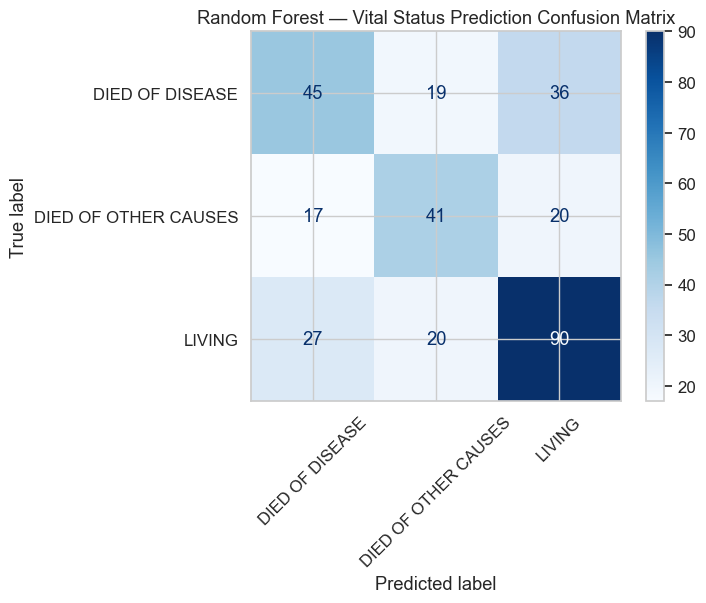

In [66]:
# SMOTE for class balancing
smote = SMOTE(random_state=42)

# pipeline
rf_multi_pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor), 
    ("smote", SMOTE(random_state=42)),
    ("classifier", RandomForestClassifier(random_state=42, class_weight="balanced"))
])

# Define hyperparameter grid
param_grid_rf_multi = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [None, 5, 10],
    "classifier__min_samples_split": [2, 5],
    "classifier__min_samples_leaf": [1, 2]
}
#  GridSearchCV 
gridsearch_rf_multi = GridSearchCV(estimator=rf_multi_pipeline,param_grid=param_grid_rf_multi,scoring="f1_macro", cv=5, n_jobs=-1,verbose=2)

# Fit the model
gridsearch_rf_multi.fit(X_multi_train, y_multi_train)

# Best model
best_rf_multi = gridsearch_rf_multi.best_estimator_
print("Best Parameters:", gridsearch_rf_multi.best_params_)

# Prediction
y_multi_pred = best_rf_multi.predict(X_multi_test)

print("Accuracy:", accuracy_score(y_multi_test, y_multi_pred))
print("\nClassification Report:\n", classification_report(y_multi_test, y_multi_pred, target_names=le_multi.classes_))

# Confusion matrix
cm_multi = confusion_matrix(y_multi_test, y_multi_pred)
disp_multi = ConfusionMatrixDisplay(confusion_matrix=cm_multi, display_labels=le_multi.classes_)
disp_multi.plot(cmap="Blues", xticks_rotation=45)
plt.title("Random Forest — Vital Status Prediction Confusion Matrix")
plt.show()


* The Random Forest model achieves 56% accuracy. 
* The model performs best at predicting LIVING patients (correctly captures 90 Living patients/62% precision), but slightly struggles with deceased patients it correctly captured 41 patients who DIED OF OTHER CAUSES and it correctly captured 45 patients who DIED OF DISEASE(Breast cancer).
* The macro average F1-score of 0.54 indicates moderate performance across the three classes. The next step is to try a more advanced model that can better capture complex patterns  (Died of Disease class). 

In [67]:
# Get the fitted preprocessor
fitted_preprocessor = best_rf_multi.named_steps['preprocessor']

# Get categorical feature names
cat_features = fitted_preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine with numeric features
all_features = list(cat_features) + numerical_cols

# Extract Random Forest feature importances
importances = best_rf_multi.named_steps['classifier'].feature_importances_

# Create a DataFrame
feature_importance = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show top 15 features
feature_importance.head(15)


,Feature,Importance
56,Age at Diagnosis,0.135668
60,Nottingham prognostic index,0.090477
62,Tumor Size,0.069654
61,TMB (nonsynonymous),0.059971
57,Cohort,0.053670
59,Lymph nodes examined positive,0.042892
58,Neoplasm Histologic Grade,0.023178
63,Tumor Stage,0.021242
26,Inferred Menopausal State_POST,0.019390
53,3-Gene classifier subtype_ER+/HER2- LOW PROLIF,0.018518


* The multiclass model shows that a patient’s Age at Diagnosis, Nottingham prognostic index, tumor size, lymph node involvement, Inferred Menopausal State, are the most important factors in predicting whether someone will live or die from the disease.

* Both the patient’s condition and the treatments received play a big role in determining survival outcomes. Lets try XGBoost model

In [68]:
# XGBoost model

# SMOTE for class balancing
smote = SMOTE(random_state=42)

# Define the XGBoost model inside a pipeline
xgb_multi_pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", XGBClassifier(objective="multi:softprob", eval_metric="mlogloss", num_class=3, random_state=42, use_label_encoder=False))
])
#xgb_multi_pipeline.fit(X_multi_train, y_multi_train)

# Parametric grid
paramgrid_xgb = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [3, 5, 7],
    "classifier__learning_rate": [0.01, 0.1],
    "classifier__subsample": [0.8, 1.0],
    "classifier__colsample_bytree": [0.8, 1.0],
}

# gridsearch cv
gridsearch_xgb_multi = GridSearchCV(estimator=xgb_multi_pipeline, param_grid=paramgrid_xgb, scoring="f1_macro", cv=3, n_jobs=-1,verbose=2)

# fit training data
gridsearch_xgb_multi.fit(X_multi_train, y_multi_train)



Fitting 3 folds for each of 48 candidates, totalling 144 fits


C:\Users\ADMIN\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:18:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"Pipeline(step...ass=3, ...))])"
,param_grid,"{'classifier__colsample_bytree': [0.8, 1.0], 'classifier__learning_rate': [0.01, 0.1], 'classifier__max_depth': [3, 5, ...], 'classifier__n_estimators': [100, 200], ...}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('cat', ...), ('num', ...)]"


Best Parameters: {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 1.0}

Accuracy: 0.5841
Macro F1-Score: 0.5660

Classification Report:
                      precision    recall  f1-score   support

     DIED OF DISEASE       0.58      0.36      0.44       100
DIED OF OTHER CAUSES       0.49      0.74      0.59        78
              LIVING       0.67      0.66      0.66       137

            accuracy                           0.58       315
           macro avg       0.58      0.59      0.57       315
        weighted avg       0.60      0.58      0.58       315

Full pipeline (with preprocessor) saved successfully.


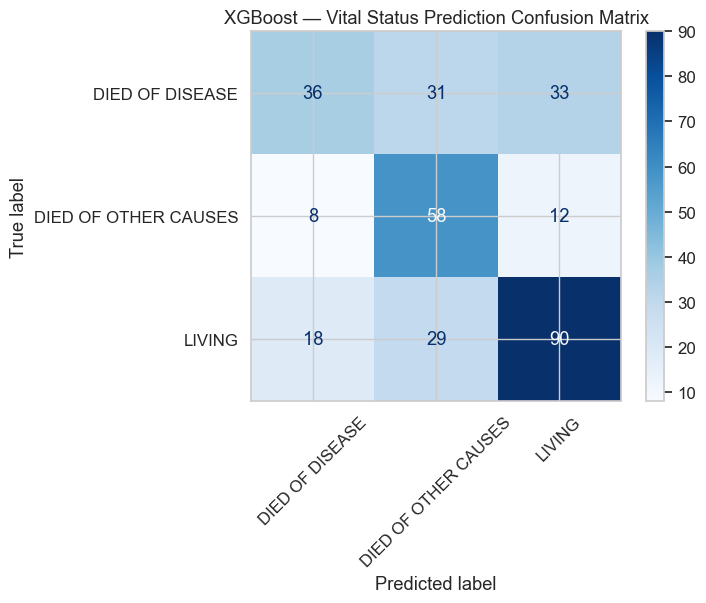

In [69]:
# Best model
best_xgb_multi = gridsearch_rf_multi.best_estimator_
print("Best Parameters:", gridsearch_xgb_multi.best_params_)

# Predictions
y_pred_xgb = gridsearch_xgb_multi.predict(X_multi_test)

# Evaluation
acc_xgb = accuracy_score(y_multi_test, y_pred_xgb)
f1_macro_xgb = f1_score(y_multi_test, y_pred_xgb, average="macro")

print(f"\nAccuracy: {acc_xgb:.4f}")
print(f"Macro F1-Score: {f1_macro_xgb:.4f}")
print("\nClassification Report:")
print(classification_report(y_multi_test, y_pred_xgb, target_names=le_multi.classes_))

# Confusion Matrix
cm = confusion_matrix(y_multi_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_multi.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
# plt.savefig(" Vital Status Prediction cm.png")
plt.title("XGBoost — Vital Status Prediction Confusion Matrix")

joblib.dump(best_xgb_multi, "vital_status_model.joblib")
print("Full pipeline (with preprocessor) saved successfully.")

* XGBoost model performed better overall,
* It has higher accuracy (0.58 vs 0.56).
* Higher macro F1 (0.566 vs 0.54) — this shows better average balance across classes.
* Performs particularly better on the minority “DIED OF OTHER CAUSES” class.

In [70]:
# Feature importance
# Get the fitted preprocessor
fitted_preprocessor = best_xgb_multi.named_steps['preprocessor']

# Get categorical feature names
cat_features = fitted_preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine with numeric features
all_features = list(cat_features) + numerical_cols

# Extract Random Forest feature importances
importances = best_xgb_multi.named_steps['classifier'].feature_importances_

# Create a DataFrame
feature_importance = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show top 15 features
feature_importance.head(15)


,Feature,Importance
56,Age at Diagnosis,0.135668
60,Nottingham prognostic index,0.090477
62,Tumor Size,0.069654
61,TMB (nonsynonymous),0.059971
57,Cohort,0.053670
59,Lymph nodes examined positive,0.042892
58,Neoplasm Histologic Grade,0.023178
63,Tumor Stage,0.021242
26,Inferred Menopausal State_POST,0.019390
53,3-Gene classifier subtype_ER+/HER2- LOW PROLIF,0.018518


**Deeper XGBoost Hyperparameter Optimization**

In [71]:
from sklearn.preprocessing import FunctionTransformer
preserve_df = FunctionTransformer(lambda x: x, validate=False)


# Filter columns
categorical_cols = [col for col in categorical_cols if col in X_multi_train.columns]
numerical_cols = [col for col in numerical_cols if col in X_multi_train.columns]

# Preprocessor
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

# Smote to handle class imbalance
smote = SMOTE(random_state=42, k_neighbors=2)

xgb_advanced = XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', use_label_encoder=False, random_state=42, n_jobs=-1)

# Full pipeline
pipeline_xgb_multi = ImbPipeline([
    ('preserve', preserve_df),
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', xgb_advanced)
])

# Expanded parameter grid for deeper tuning
paramgrid = {
    'classifier__n_estimators': [200],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__min_child_weight': [1, 3],
    'classifier__gamma': [0, 0.1],
}

# GridSearchCV with more refined parameter space
grid_search_XGB_advanced = GridSearchCV(pipeline_xgb_multi, paramgrid, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=2)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\ADMIN\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:18:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best parameters: {'classifier__gamma': 0, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__min_child_weight': 3, 'classifier__n_estimators': 200}
Accuracy: 0.5650793650793651
              precision    recall  f1-score   support

           0       0.53      0.39      0.45       100
           1       0.52      0.65      0.58        78
           2       0.62      0.64      0.63       137

    accuracy                           0.57       315
   macro avg       0.55      0.56      0.55       315
weighted avg       0.56      0.57      0.56       315



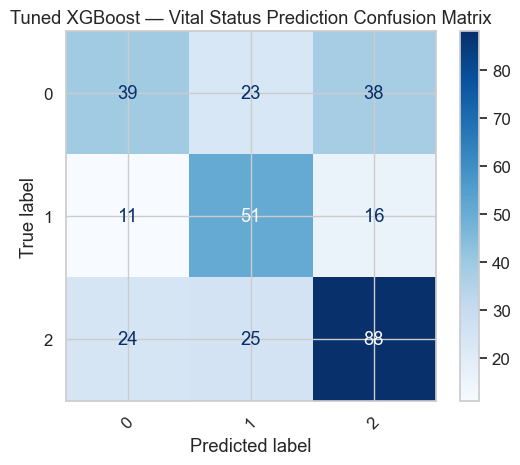

In [72]:
# Fit the model
grid_search_XGB_advanced.fit(X_multi_train, y_multi_train)

# prediction
y_pred_advanced = grid_search_XGB_advanced.predict(X_multi_test)

# Evaluate
print("\nBest parameters:", grid_search_XGB_advanced.best_params_)
print("Accuracy:", accuracy_score(y_multi_test, y_pred_advanced))
# Convert numeric labels to strings for display
le_multi.classes_ = np.unique(y_multi_test).astype(str)

print(classification_report(y_multi_test, y_pred_advanced, target_names=le_multi.classes_))


# Confusion Matrix
cm = confusion_matrix(y_multi_test, y_pred_advanced)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_multi.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Tuned XGBoost — Vital Status Prediction Confusion Matrix")
plt.show()




* The tuned XGBoost model shows a strong performance for LIVING patients class it correctly identifies 88 of living patients, moderate recognition of DIED OF OTHER CAUSES (51) and  detection of DIED OF DISEASE (39).
* Tuned XGBoost has a macro F1 score of 0.55 while the untuned XGBoost have 0.57. untuned XGBoost performs better for all the classes


### **OBSERVATIONS**
* LIVING patients are predicted best across all the models.
* DIED OF DISEASE class remains the hardest to predict, likely due to fewer samples .
* The XGBoost model remain the best model because it has higher F1 macro-score

#### **INTERPRETATION OF FEATURES**
* Age at Diagnosis- Older patients have higher risk of death.
* Nottingham Prognostic Index, Tumor Size, Lymph Nodes Positive, Neoplasm Grade - When breast tumors are larger, more aggressive, and have spread to the lymph nodes, the chances of death are higher.
* Molecular features (TMB, Integrative Cluster, 3-Gene subtype): The tumor’s biological profile affects how aggressive the cancer is and how likely it is to cause death..
* The type of treatment a patient receives—like chemotherapy, hormone therapy, or surgery—has a strong link to how well they survive.

#### **CLINICAL INSIGHT**
* Identify High-Risk Patients: Age, tumor size, grade, lymph nodes, and molecular features help identify patients at high risk for cancer-related death.
* Distinguish Cause of Death: Differentiates between DIED OF DISEASE and DIED OF OTHER CAUSES, which is critical for planning interventions.
* Guide Treatment Decisions: Understanding a patient’s treatment history and tumor characteristics helps doctors decide who needs stronger therapy and who can be safely monitored.
* Support Personalized Care: Highlights patient-specific risk factors (age, menopausal state, molecular subtype), helping oncologists tailor care.

Model Choice: XGBoost is preferred for clinical utility due to slightly better f1-macro score and ability to capture interactions.


### **How Pam50 + Claudin-low subtypes, chemotherapy and Patient's Vital/survival Status influence each other.**

In [73]:
# how chemotherapy interacts with subtype and survival outcomes.
pd.crosstab(df['Pam50 + Claudin-low subtype'],[df['Chemotherapy'], df["Patient's Vital Status"]],normalize='index')



Chemotherapy                             NO                                 \
Patient's Vital Status      DIED OF DISEASE DIED OF OTHER CAUSES    LIVING   
Pam50 + Claudin-low subtype                                                  
BASAL                              0.140940             0.100671  0.208054   
CLAUDIN-LOW                        0.138158             0.131579  0.381579   
HER2                               0.207317             0.189024  0.182927   
LUMA                               0.204959             0.309091  0.403306   
LUMB                               0.329049             0.257069  0.326478   
NORMAL                             0.230088             0.159292  0.327434   

Chemotherapy                            YES                                 
Patient's Vital Status      DIED OF DISEASE DIED OF OTHER CAUSES    LIVING  
Pam50 + Claudin-low subtype                                                 
BASAL                              0.234899             0.020134  0.295302  
CLAUDIN-LOW                        0.131579             0.019737  0.197368  
HER2                               0.256098             0.024390  0.140244  
LUMA                               0.024793             0.003306  0.054545  
LUMB                               0.051414             0.010283  0.025707  
NORMAL                             0.141593             0.008850  0.132743

**Interpretation**
1. **Basal subtype**
* Without chemotherapy: 14% patients died of the disease.
* With chemotherapy: it rises to 24% patients who died of the disease
* This may suggest that Basal tumors are  aggressive and even with chemotherapy, survival remains poor. These patients might need more 
intensive or targeted therapy.

2. **Claudin-low subtype**
* Without chemo: 14% died of disease.
* With chemo: 13% died of disease
* Small difference — suggests that chemotherapy slightly helps Claudin-low cancers subtypes , but with no big impact it requires other treatment approaches.

3. **HER2-enriched subtype**
* Without chemo: 21% died of disease.
* With chemo: 26% died of the disease
* Even with chemo, HER2 patients have a high disease-related death rate. This suggest that targeted HER2 therapy (like trastuzumab and pertuzumab)
are essential, not chemotherapy alone.

4. **Luminal A subtype (LUMA)**
* Without chemo: 20% died of disease.
* With chemo: only 2.5%.
* A huge drop seen here suggesting that chemotherapy is effective here.
  
5. **Luminal B subtype (LUMB)**
* Without chemo: 33.7% died of disease.
* With chemo: only 5.9%.
* Also have a major benefit from chemotherapy — Luminal B tumors respond well to chemotherapy.


### **How the Pam50 Subtypes, Type of Sugery done and Patient survival Status influence one another**

In [74]:
# How breast cancer subtypes, Type of Breast Surgery done and patient survival outcomes interact
pd.crosstab(df['Pam50 + Claudin-low subtype'],[df['Type of Breast Surgery'], df["Patient's Vital Status"]],normalize='index')


Type of Breast Surgery      BREAST CONSERVING                                 \
Patient's Vital Status        DIED OF DISEASE DIED OF OTHER CAUSES    LIVING   
Pam50 + Claudin-low subtype                                                    
BASAL                                0.147651             0.040268  0.302013   
CLAUDIN-LOW                          0.125000             0.059211  0.263158   
HER2                                 0.073171             0.060976  0.158537   
LUMA                                 0.062810             0.102479  0.236364   
LUMB                                 0.133676             0.102828  0.182519   
NORMAL                               0.115044             0.035398  0.159292   

Type of Breast Surgery           MASTECTOMY                                 
Patient's Vital Status      DIED OF DISEASE DIED OF OTHER CAUSES    LIVING  
Pam50 + Claudin-low subtype                                                 
BASAL                              0.228188             0.080537  0.201342  
CLAUDIN-LOW                        0.144737             0.092105  0.315789  
HER2                               0.390244             0.152439  0.164634  
LUMA                               0.166942             0.209917  0.221488  
LUMB                               0.246787             0.164524  0.169666  
NORMAL                             0.256637             0.132743  0.300885

**Interpretation**
* Breast-Conserving Surgery is a surgery where only the tumor and small amount of surrounding tissue are removed
* Mastectomy is a type of surgery where the entire breast is removed to treat the breast cancer.

1. **Basal subtype**
* Breast-Conserving Surgery : 15% died of disease.
* Mastectomy: reported higher — 23% died of disease.
* Interpretation: Even with mastectomy, Basal tumors show high disease-related deaths. This reinforces that Basal-like cancers are  aggressive
& intensive and targeted therapy are crucial, surgery alone is insufficient.

2. **Claudin-Low subtype**
* Breast-Conserving Surgery: 12% died of disease.
* Mastectomy: 14.7% died of disease.
* Small difference between surgery types. Suggests that surgery type doesn’t strongly alter outcomes here, perhaps because Claudin-low tumors are driven by stem-cell-like or immune features, making systemic treatment more relevant.

3. **HER2-enriched subtype**
* Breast-Conserving Surgery : 9% died of disease.
* Mastectomy: 38.8% died of disease.
*  Indicates that HER2-targeted therapy (trastuzumab, pertuzumab) is far more effective for survival than surgical extent for these cancer types.

4. **Luminal A (LUMA) subtype**
* Breast-Conserving Surgery: 5.7% died of disease.
* Mastectomy: 15.9% died of disease.
* Luminal A cancers do very well overall, especially after breast-conserving surgery. Suggests that less aggressive surgery(BCS) with 
additional hormone therapy achieves excellent control of this subtype.

5. **Luminal B (LUMB) subtype**
* Breast-Conserving Surgery: 15% died of disease.
* Mastectomy: 24% died of disease
* Similar to Luminal A, Luminal B patients also fare relatively well with breast-conserving surgery plus hormone therapy. 
The higher death rate in mastectomy cases again likely reflects more advanced baseline disease, not failure of surgery itself.


**Overall Summary**
* Patients with Luminal A and B subtypes tend to live longer/survive, especially when they have breast-conserving surgery combined with hormonal therapy, indicating that these cancers respond well to less aggressive surgery combined with standard treatments.                                                                                                    
* Patients with Basal or HER2-enriched cancers tend to have worse survival, and the type of surgery done whether breast-conserving or mastectomy 
doesn’t make much difference. What really matters for them is getting the right systemic treatments like chemotherapy or targeted therapy.                          
* Patients with Claudin-low cancers show only a small survival improvement no matter which surgery they have, indicating that 
immune-based or other biological treatments might be more helpful rather than surgery alone.

### **How breast cancer subtypes, Radio therapy and patient survival outcomes interact**

In [75]:
# Crosstab: Pam50 subtype × Radiotherapy × Patient’s Vital Status
pd.crosstab(df['Pam50 + Claudin-low subtype'],[df['Radio Therapy'], df["Patient's Vital Status"]],normalize='index')


Radio Therapy                            NO                                 \
Patient's Vital Status      DIED OF DISEASE DIED OF OTHER CAUSES    LIVING   
Pam50 + Claudin-low subtype                                                  
BASAL                              0.134228             0.053691  0.127517   
CLAUDIN-LOW                        0.065789             0.065789  0.190789   
HER2                               0.170732             0.128049  0.103659   
LUMA                               0.128926             0.170248  0.157025   
LUMB                               0.131105             0.120823  0.123393   
NORMAL                             0.185841             0.141593  0.203540   

Radio Therapy                           YES                                 
Patient's Vital Status      DIED OF DISEASE DIED OF OTHER CAUSES    LIVING  
Pam50 + Claudin-low subtype                                                 
BASAL                              0.241611             0.067114  0.375839  
CLAUDIN-LOW                        0.203947             0.085526  0.388158  
HER2                               0.292683             0.085366  0.219512  
LUMA                               0.100826             0.142149  0.300826  
LUMB                               0.249357             0.146530  0.228792  
NORMAL                             0.185841             0.026549  0.256637

**Summary Insight**
* Radiotherapy supports better survival in several subtypes, especially Luminal A, its disease-related deaths drops notably.
However, for Basal, HER2, and Luminal B, radiotherapy alone isn’t enough they likely need stronger systemic therapies (chemotherapy, targeted, or combination treatments).


# **RECOMMENDATIONS**

1. **Integrate these tools into hospital workflows**
* Use survival and vital prediction model to identify high-risk patients and guide individualized monitoring and treatment decisions.
* Use molecular subtype prediction model to estimate tumor aggressiveness when full genetic testing is unavailable.

2. **Use feature importance analysis insight to prioritize High-Risk Patients:**
* Older patients(Above 75) , those with larger tumors, higher grade, more positive lymph nodes, should receive closer monitoring.

3. **Personalize treatment planning for each subtype:**
* Luminal A  Respond best hormone therapy
* Luminal B: Respond best to combined hormone and chemo therapy
* HER2-enriched: Require targeted therapy (e.g., trastuzumab, pertuzumab)  these significantly improve survival beyond what surgery alone can achieve.
* Basal-like: Aggressive tumors that need intensive targeted systemic therapy surgery alone isn’t enough for effective treatment
* Claudin-low: Benefit most from biological treatments they show limited response to surgery or chemotherapy alone.
  
